In [1]:
import xarray as xa
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import pearsonr

In [2]:
def load_data(var):
    file = '/tempest/duan0000/exprecip/ERA5/data/N2N_Monsoon/' + var +'_1979_2019' # month: 5, 6, 7, 8, 9
    data = xa.open_dataarray(file)
    return data

In [5]:
def process_dataarray(x, lon=True):
    x = x.sel(time=is_monsoon_precip(x.time.dt.month))
    if lon:
        x = x.sel(longitude=slice(-150, -71)).sel(latitude=slice(64, -1))
    else:
        x = x.sel(longitude=slice(-150+360, -71+360)).sel(latitude=slice(64, -1))
    return x
def is_monsoon_precip(month):
    return (month <= 9) & (month >= 6)

In [6]:
daily_ivt_a = load_data('ivt_a')
daily_ivt_a = process_dataarray(daily_ivt_a)
daily_ivt_b = load_data('ivt_b')
daily_ivt_b = process_dataarray(daily_ivt_b)

In [7]:
daily_ivt_a

<xarray.DataArray (time: 5002, latitude: 261, longitude: 317)>
[413850474 values with dtype=float32]
Coordinates:
  * longitude   (longitude) float32 -150.0 -149.8 -149.5 ... -71.5 -71.25 -71.0
  * latitude    (latitude) float32 64.0 63.75 63.5 63.25 ... -0.5 -0.75 -1.0
  * time        (time) datetime64[ns] 1979-06-01 1979-06-02 ... 2019-09-30
    month_date  (time) object ...

In [9]:
point_ivt_a = daily_ivt_a.sel(latitude=31.10, longitude=-114.08, method='nearest')
point_ivt_b = daily_ivt_b.sel(latitude=31.10, longitude=-114.08, method='nearest')

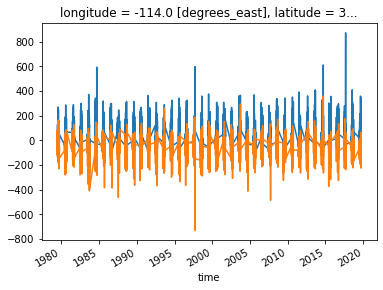

In [10]:
point_ivt_a.plot()
point_ivt_b.plot()

In [11]:
print(pearsonr(point_ivt_a.data, point_ivt_b.data))

PearsonRResult(statistic=-0.1413926869140228, pvalue=9.376092092026528e-24)


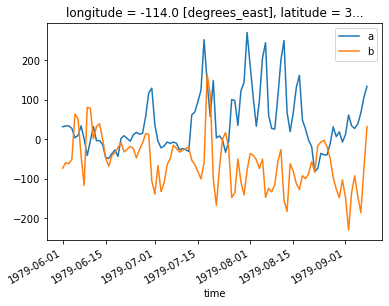

In [13]:
point_ivt_a.isel(time=slice(0, 100)).plot(label='a')
point_ivt_b.isel(time=slice(0, 100)).plot(label='b')
plt.legend()

In [15]:
quantile = point_ivt_a.quantile(0.95, dim="time")
print(quantile)

<xarray.DataArray ()>
array(212.19653168)
Coordinates:
    quantile  float64 0.95


In [17]:
point_surge = point_ivt_a[point_ivt_a>quantile]
print(point_surge)

<xarray.DataArray (time: 251)>
array([251.86848, 270.2545 , 244.13797, ..., 358.6719 , 260.36002, 347.5701 ],
      dtype=float32)
Coordinates:
    longitude   float32 -114.0
    latitude    float32 31.0
  * time        (time) datetime64[ns] 1979-07-17 1979-07-31 ... 2019-09-02
    month_date  (time) object 07-17 07-31 08-06 08-12 ... 08-25 09-01 09-02
    quantile    float64 0.95


-82.11414   -77.72328


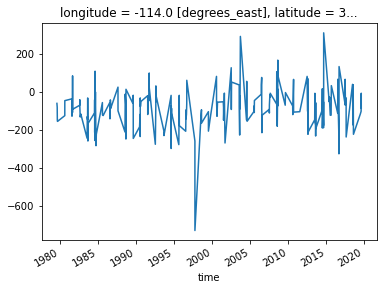

In [21]:
surge_b = point_ivt_b.sel(time=point_surge.time)
surge_b.plot()
print(surge_b.mean().data, ' ', surge_b.median().data)

In [22]:
point_ivt_a = daily_ivt_a.sel(latitude=29.69, longitude=-113.1, method='nearest')
point_ivt_b = daily_ivt_b.sel(latitude=29.69, longitude=-113.1, method='nearest')

In [23]:
print(pearsonr(point_ivt_a.data, point_ivt_b.data))

PearsonRResult(statistic=-0.17209472507910484, pvalue=1.486855976456006e-34)


<xarray.DataArray ()>
array(246.72742996)
Coordinates:
    quantile  float64 0.95
<xarray.DataArray (time: 251)>
array([297.57944, 252.07817, 372.0883 , ..., 335.91208, 348.74313, 327.89227],
      dtype=float32)
Coordinates:
    longitude   float32 -113.0
    latitude    float32 29.75
  * time        (time) datetime64[ns] 1979-07-17 1979-07-30 ... 2019-09-02
    month_date  (time) object 07-17 07-30 07-31 08-01 ... 08-25 09-01 09-02
    quantile    float64 0.95
-105.0952   -99.94328


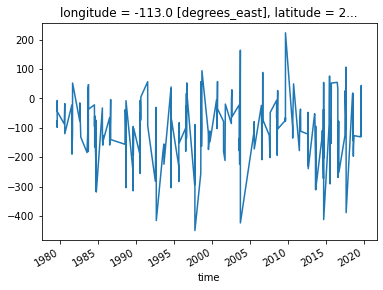

In [24]:
quantile = point_ivt_a.quantile(0.95, dim="time")
print(quantile)
point_surge = point_ivt_a[point_ivt_a>quantile]
print(point_surge)
surge_b = point_ivt_b.sel(time=point_surge.time)
surge_b.plot()
print(surge_b.mean().data, ' ', surge_b.median().data)